<a href="https://colab.research.google.com/github/adityapatil4141/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [347]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [348]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [349]:
# Load Dataset
df_names = pd.read_csv("/content/drive/MyDrive/work files /Project/Zomato Restaurant names and Metadata.csv")
df_reviews = pd.read_csv("/content/drive/MyDrive/work files /Project/Zomato Restaurant reviews.csv")

### Dataset First View

In [350]:
# Dataset First Look
df_names.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [351]:
df_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [352]:
# Dataset Rows & Columns count
print("meta_data Rows & Columns count =",df_names.shape)
print("reviews dataset Rows & Columns count =",df_reviews.shape)

meta_data Rows & Columns count = (105, 6)
reviews dataset Rows & Columns count = (10000, 7)


### Dataset Information

In [353]:
# Dataset Info
df_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [354]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [355]:
# Dataset Duplicate Value Count
df_names.duplicated().sum()

0

In [356]:
df_reviews.duplicated().sum()

36

#### Missing Values/Null Values

In [357]:
# Missing Values/Null Values Count
print("meta_data null values count = ",df_names.isnull().sum())
print("reviews dataset null values count = ",df_reviews.isnull().sum())

meta_data null values count =  Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64
reviews dataset null values count =  Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


Text(0.5, 1.0, 'Null values in meta_data dataset')

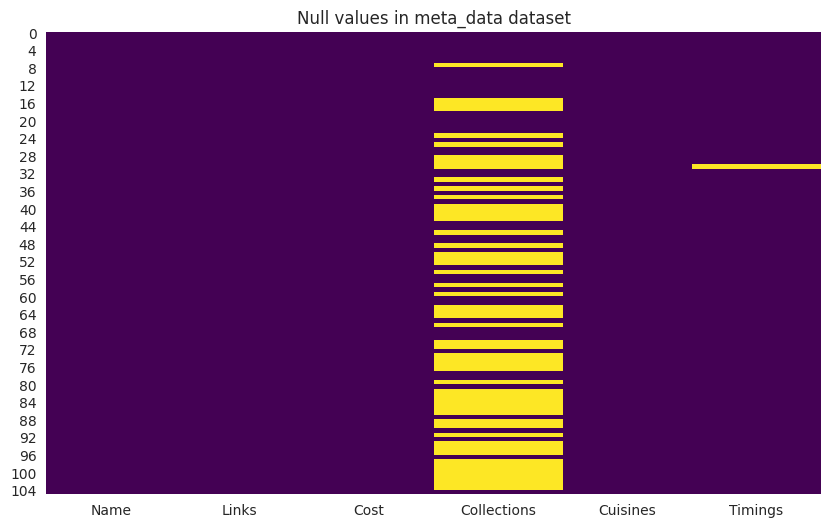

In [358]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df_names.isnull(),cmap='viridis',cbar=False)
plt.title("Null values in meta_data dataset")

<Axes: >

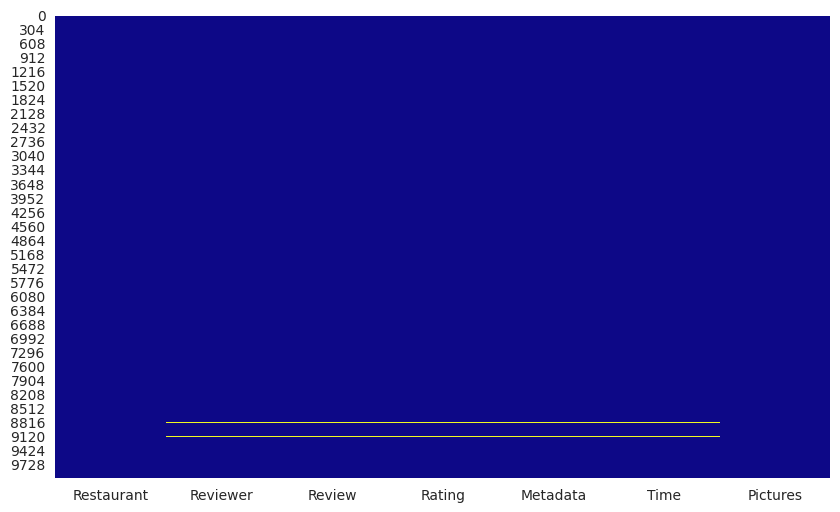

In [359]:
plt.figure(figsize=(10,6))
sns.heatmap(df_reviews.isnull(),cmap='plasma',cbar=False,annot=False)

### What did you know about your dataset?

There are two datasets (Metadata and Reviews). Names dataset provides information about resturants, cuisines,cost whereas reviews dataset provides information about cutomer reviews and rating. Metadata has no duplicate values but has 54 missing values, whereas review column has 197 total missing values and 36 duplicate values. metadata has 105 rows and 6 columns whereas review column has 10,000 rows and 7 columns.

## ***2. Understanding Your Variables***

In [360]:
# Dataset Columns
df_names.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [361]:
df_reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [362]:
# Dataset Describe
df_names.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [363]:
df_reviews.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [364]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [365]:
# Write your code to make your dataset analysis ready.

# Column rename:
df_names.rename(columns={'Name': 'Restaurant'},inplace=True)
df_names=df_names[['Restaurant','Cost','Cuisines','Collections']]


In [366]:
df_names

,Restaurant,Cost,Cuisines,Collections
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","Food Hygiene Rated Restaurants in Hyderabad, C..."
1,Paradise,800,"Biryani, North Indian, Chinese",Hyderabad's Hottest
2,Flechazo,"1,300","Asian, Mediterranean, North Indian, Desserts","Great Buffets, Hyderabad's Hottest"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",Late Night Restaurants
4,Over The Moon Brew Company,"1,200","Asian, Continental, North Indian, Chinese, Med...","Best Bars & Pubs, Food Hygiene Rated Restauran..."
...,...,...,...,...
100,IndiBlaze,600,"Fast Food, Salad",NaN
101,Sweet Basket,200,"Bakery, Mithai",NaN
102,Angaara Counts 3,500,"North Indian, Biryani, Chinese",NaN
103,Wich Please,250,Fast Food,NaN


In [367]:
df_names['Cost'].max()

'900'

In [368]:
# Converting Cost column into float/int Dtype:
df_names['Cost'] = df_names['Cost'].str.replace(",","" ).astype('int64')

<ipython-input-368-51db1953b52c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_names['Cost'] = df_names['Cost'].str.replace(",","" ).astype('int64')


In [369]:
# Findin and replacing null values.
df_names.isnull().sum()
df_names.fillna('unknown',inplace=True)

<ipython-input-369-25d1bf9fa4ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_names.fillna('unknown',inplace=True)


<Axes: >

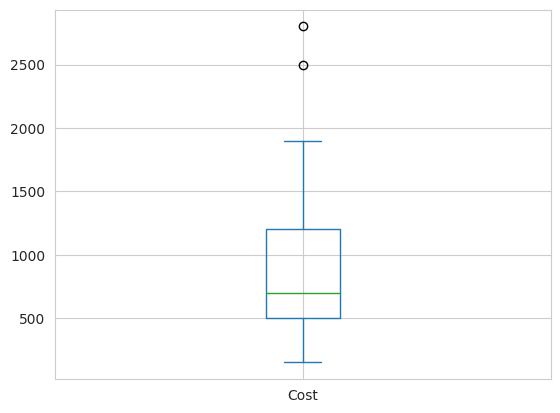

In [370]:
df_names.plot(kind='box')

<Axes: >

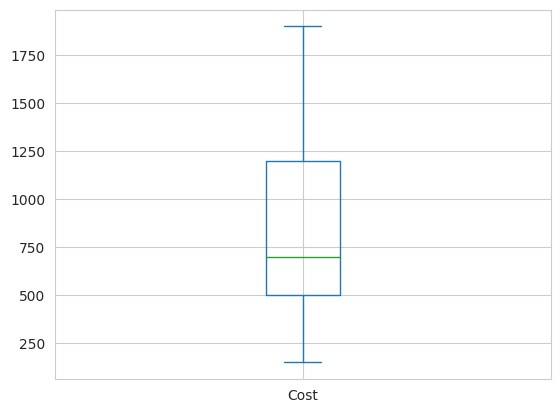

In [371]:
# Calculate IQR
Q1 = df_names['Cost'].quantile(0.25)
Q3 = df_names['Cost'].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify and remove outliers
df_names = df_names[(df_names['Cost'] >= Q1 - threshold * IQR) & (df_names['Cost'] <= Q3 + threshold * IQR)]

# Display DataFrame after removing outliers
df_names['Cost'].plot(kind='box')


### What all manipulations have you done and insights you found?

1. Removed unwanted columns 'Links' & 'Timings'.
2. Missing values handeling (filled them with 'unkown').
3. Changed column name from 'Name' ==> 'Restaurant'
4. Removed outliers

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [372]:
# Chart - 1 visualization code
df_names.head()

,Restaurant,Cost,Cuisines,Collections
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","Food Hygiene Rated Restaurants in Hyderabad, C..."
1,Paradise,800,"Biryani, North Indian, Chinese",Hyderabad's Hottest
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts","Great Buffets, Hyderabad's Hottest"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",Late Night Restaurants
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med...","Best Bars & Pubs, Food Hygiene Rated Restauran..."


In [373]:
# Found how many restaurants has how much cost:
df_names['Cost'].value_counts()

500     13
600     10
700      8
1200     7
400      6
1000     6
200      5
800      5
1500     5
1300     4
350      3
1600     3
750      3
550      3
900      3
1100     3
1700     2
450      2
1400     2
150      2
1900     2
300      1
850      1
650      1
1800     1
1750     1
250      1
Name: Cost, dtype: int64

Text(0, 0.5, 'No.of restaurants')

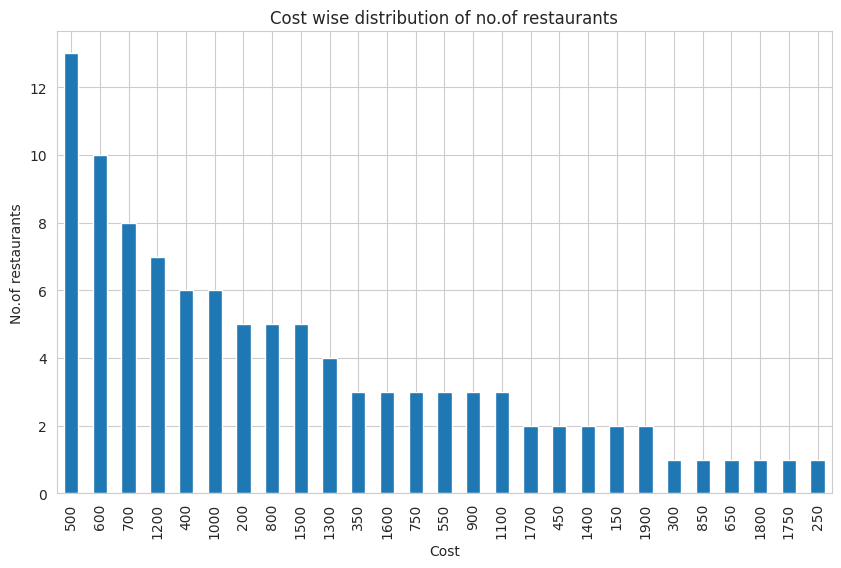

In [374]:
# Plotted Cost wise distribution of no. of restaurants:
plt.figure(figsize=(10,6))
df_names['Cost'].value_counts().plot(kind='bar')
plt.title("Cost wise distribution of no.of restaurants")
plt.xlabel("Cost")
plt.ylabel("No.of restaurants")

In [375]:
# Top 10 costliest restaurants:
costliest_restaurants_10 = df_names[['Restaurant','Cost']].nlargest(10,'Cost')

Text(0, 0.5, 'Restaurant')

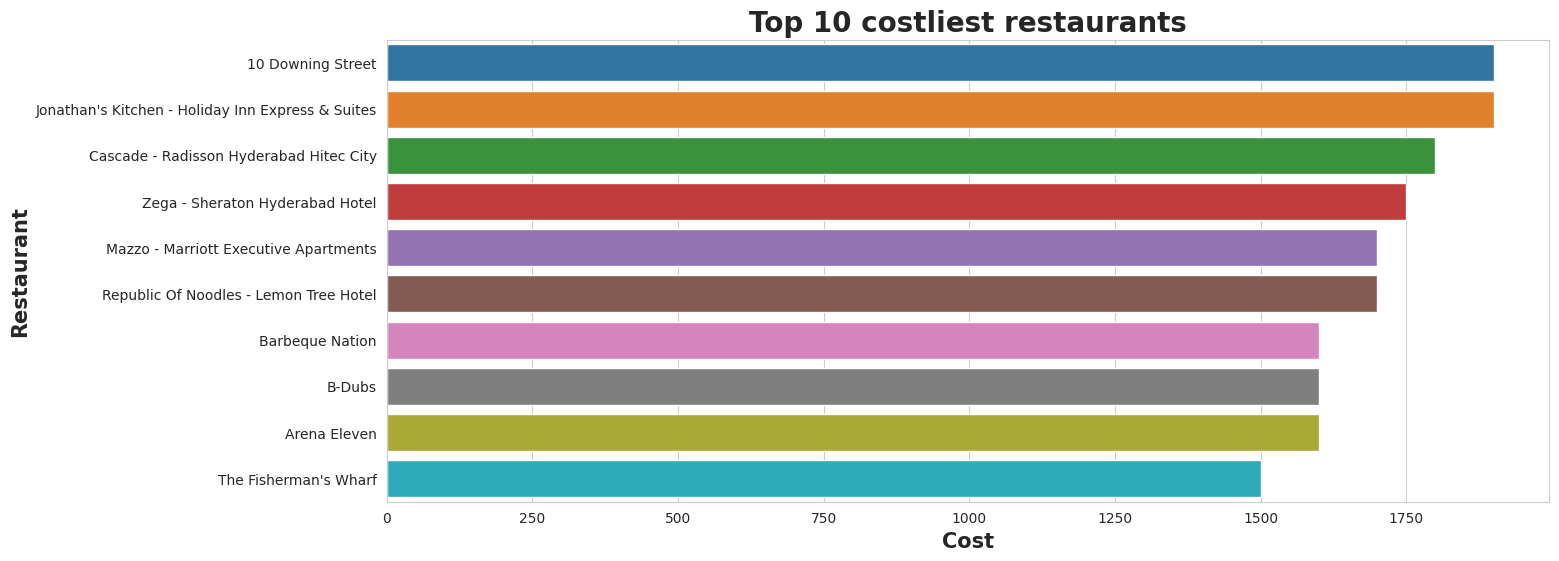

In [376]:
# Plotted top 10 costliest restaurants:
plt.figure(figsize=(15,6))
x = costliest_restaurants_10['Cost']
y = costliest_restaurants_10['Restaurant']
sns.barplot(x=x,y=y)
plt.title('Top 10 costliest restaurants',weight='bold',fontsize=20)
plt.xlabel('Cost',weight='bold',fontsize=15)
plt.ylabel('Restaurant',weight='bold',fontsize=15)

##### 1. Why did you pick the specific chart?

Barplot here shows how many restaurants are there who costs 500 or costs 1900 etc.

##### 2. What is/are the insight(s) found from the chart?

We found top 10 expensive restaurants.

#### Chart - 2

In [377]:
# Chart - 2 visualization code
# Top 10 affordable restaurants:
affordable_restaurants = df_names[['Restaurant','Cost']].nsmallest(10,'Cost').sort_values('Cost',ascending=False)

Text(0, 0.5, 'Restaurant')

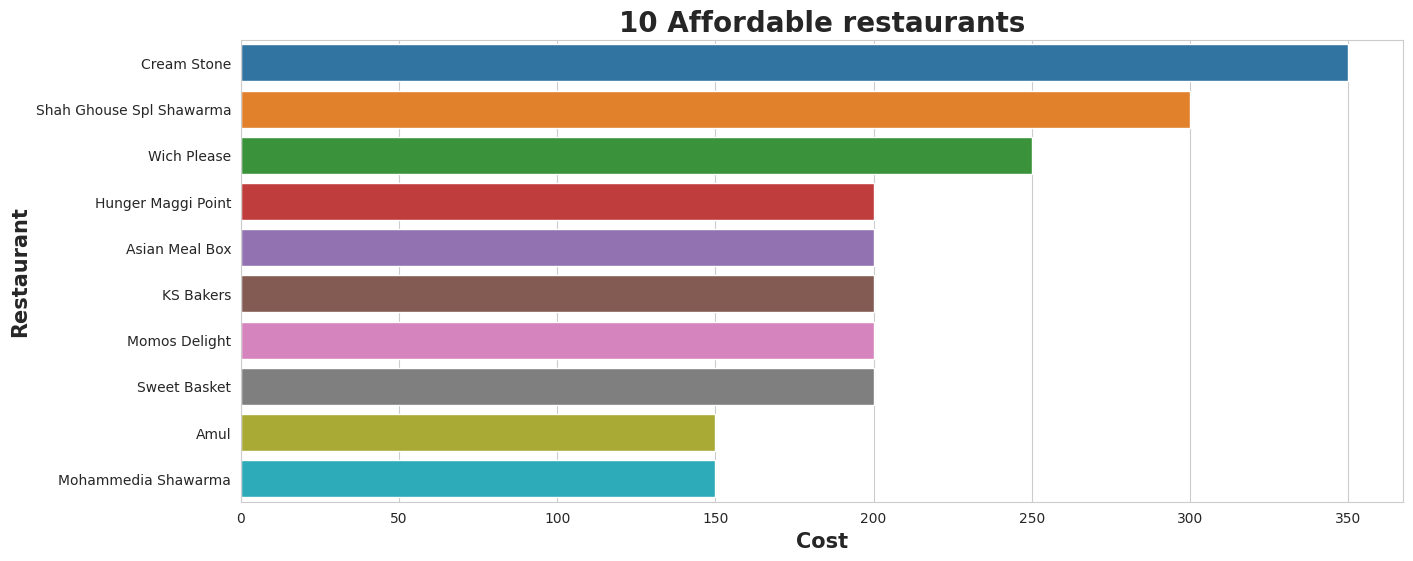

In [378]:
# Plotted top 10 affordable restaurants:
plt.figure(figsize=(15,6))
x = affordable_restaurants['Cost']
y = affordable_restaurants['Restaurant']
sns.barplot(x=x,y=y)
plt.title("10 Affordable restaurants",weight='bold',fontsize=20)
plt.xlabel("Cost",fontsize=15,weight='bold')
plt.ylabel("Restaurant",fontsize=15,weight='bold')

##### 1. Why did you pick the specific chart?

Barplot here shows how many restaurants are there who costs 500 or costs 1900 etc.

##### 2. What is/are the insight(s) found from the chart?

We found top 10 affordable restaurants.

#### Chart - 3

In [379]:
df_names.head()

,Restaurant,Cost,Cuisines,Collections
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","Food Hygiene Rated Restaurants in Hyderabad, C..."
1,Paradise,800,"Biryani, North Indian, Chinese",Hyderabad's Hottest
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts","Great Buffets, Hyderabad's Hottest"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",Late Night Restaurants
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med...","Best Bars & Pubs, Food Hygiene Rated Restauran..."


In [380]:
#This piece of code will iterate over each row of column and will replace ',' with ' ' and also conver words into lower case:
textt = [names for names in df_names['Cuisines'].str.replace(',','').str.lower()]
textt

['chinese continental kebab european south indian north indian',
 'biryani north indian chinese',
 'asian mediterranean north indian desserts',
 'biryani north indian chinese seafood beverages',
 'asian continental north indian chinese mediterranean',
 'seafood goan north indian continental asian',
 'healthy food north indian continental south indian',
 'lebanese',
 'american chinese north indian kebab south indian',
 'ice cream desserts',
 'street food north indian fast food',
 'mediterranean north indian kebab bbq',
 'continental american chinese',
 'north indian italian finger food',
 'european mediterranean north indian',
 'burger fast food',
 'north indian',
 'chinese north indian',
 'north indian chinese continental',
 'north indian chinese biryani',
 'north indian',
 'north indian japanese italian salad sushi',
 'american',
 'ice cream desserts',
 'north indian chinese continental',
 'continental',
 'mexican italian north indian chinese salad',
 'north indian mediterranean europ

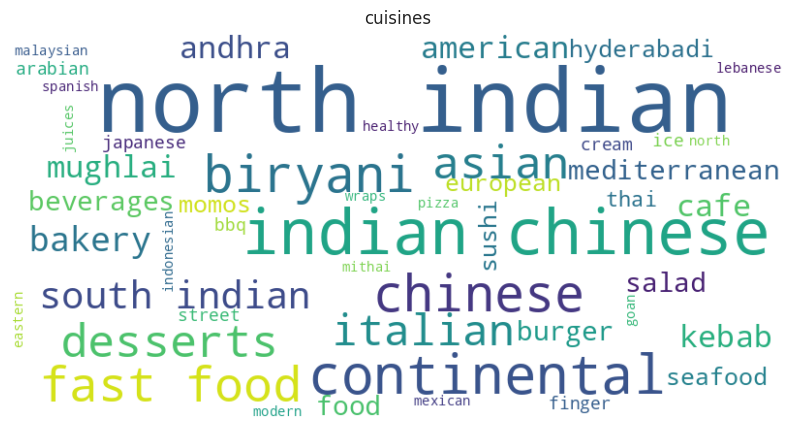

'\n1. import wordcloud\n2. created a variable and made a list comprehension which iterates through rows of cuisines column'

In [381]:
# Chart - 3 visualization code
#Generated wordcloud image which shows most occuring words in tge 'Cuisines' column.
from wordcloud import WordCloud
df_names.head()
text = " ".join(names for names in df_names['Cuisines'].str.replace(',','').str.lower())
wordcloud = WordCloud(width=800,height=400,background_color='White').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('cuisines')
plt.show()

#steps:
'''
1. import wordcloud
2. created a variable and made a list comprehension which iterates through rows of cuisines column'''

##### 1. Why did you pick the specific chart?

WordCloud is specifically used to show which words are occured most in the dataframe.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 4

In [382]:
# Chart - 4 visualization code
df_names.head()

,Restaurant,Cost,Cuisines,Collections
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","Food Hygiene Rated Restaurants in Hyderabad, C..."
1,Paradise,800,"Biryani, North Indian, Chinese",Hyderabad's Hottest
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts","Great Buffets, Hyderabad's Hottest"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",Late Night Restaurants
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med...","Best Bars & Pubs, Food Hygiene Rated Restauran..."


"\nstep1 : created a list compreansion which iterates over sorted values of 'Cost' column and fetches restaurants names.\nstep2 : converted list into string format.\n "

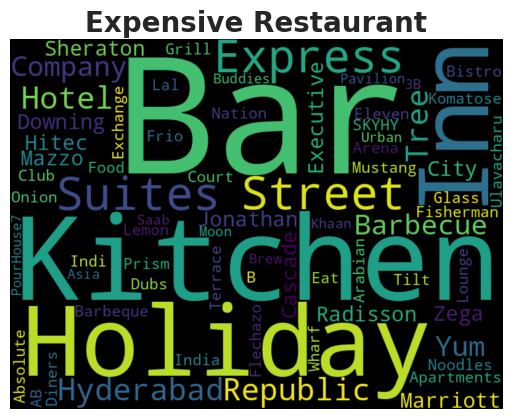

In [383]:
# generated wordcloud which shows expensive restaurants most occuring words:
text_expensive_restaurants = [names for names in df_names.sort_values('Cost',ascending=False)['Restaurant'].head(30)]
text_expensive_restaurants=' '.join(text_expensive_restaurants)
wordcloud = WordCloud(width=800,height=600,background_color='black',collocations=False).generate(text_expensive_restaurants)
plt.title('Expensive Restaurant',weight='bold',fontsize=20)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')


'''
step1 : created a list compreansion which iterates over sorted values of 'Cost' column and fetches restaurants names.
step2 : converted list into string format.
 '''

##### 1. Why did you pick the specific chart?

Wordcloud is the best visualization when it comes to finding most occured words in the dataframe.
wordloud gives words weight according to their occurence in the dataframe.

##### 2. What is/are the insight(s) found from the chart?

words like 'Bar', 'Kitchen', 'Suites','Inn', etc are some words which are commonly used by expensive restaurants.

#### Chart - 5

In [384]:
# Chart - 5 visualization code
df_names.head()

,Restaurant,Cost,Cuisines,Collections
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","Food Hygiene Rated Restaurants in Hyderabad, C..."
1,Paradise,800,"Biryani, North Indian, Chinese",Hyderabad's Hottest
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts","Great Buffets, Hyderabad's Hottest"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",Late Night Restaurants
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med...","Best Bars & Pubs, Food Hygiene Rated Restauran..."


(-0.5, 799.5, 599.5, -0.5)

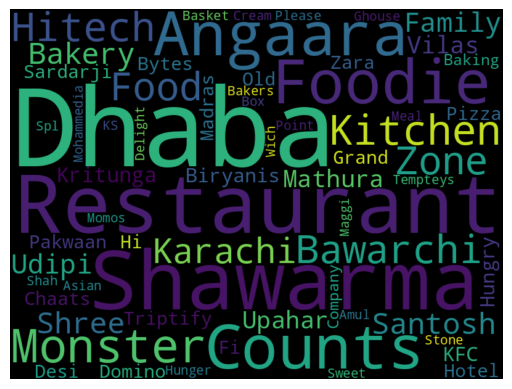

In [385]:
# Generated wordcloud for words which affordable restaurants uses the most.
affordable_restaurants_wordcolud = ' '.join(names for names in df_names.sort_values('Cost',ascending=False)['Restaurant'].tail(30))
wordcloud = WordCloud(width=800,height=600,collocations=False,background_color='black').generate(affordable_restaurants_wordcolud)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

##### 1. Why did you pick the specific chart?

Wordcloud is the best visualization when it comes to finding most occured words in the dataframe.
wordloud gives words weight according to their occurence in the dataframe.

##### 2. What is/are the insight(s) found from the chart?

words like 'Dhaba', 'Kitchen', 'Shwarma','Monster', etc are some words which are commonly used by affordable restaurants.

#### Chart - 6

In [386]:
# Chart - 6 visualization code
df_names.head()

,Restaurant,Cost,Cuisines,Collections
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","Food Hygiene Rated Restaurants in Hyderabad, C..."
1,Paradise,800,"Biryani, North Indian, Chinese",Hyderabad's Hottest
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts","Great Buffets, Hyderabad's Hottest"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",Late Night Restaurants
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med...","Best Bars & Pubs, Food Hygiene Rated Restauran..."


In [387]:
df_reviews['Reviewer'].value_counts()

Parijat Ray         13
Ankita              13
Kiran               12
Vedant Killa        11
Jay Mehta           11
                    ..
Anjana Dandekar      1
Shailesh Agarwal     1
Vinaya Chekuri       1
Sonal Ambani         1
Bhargava Krishna     1
Name: Reviewer, Length: 7446, dtype: int64

In [388]:
reviewers_count = df_reviews['Reviewer'].value_counts().head(8)

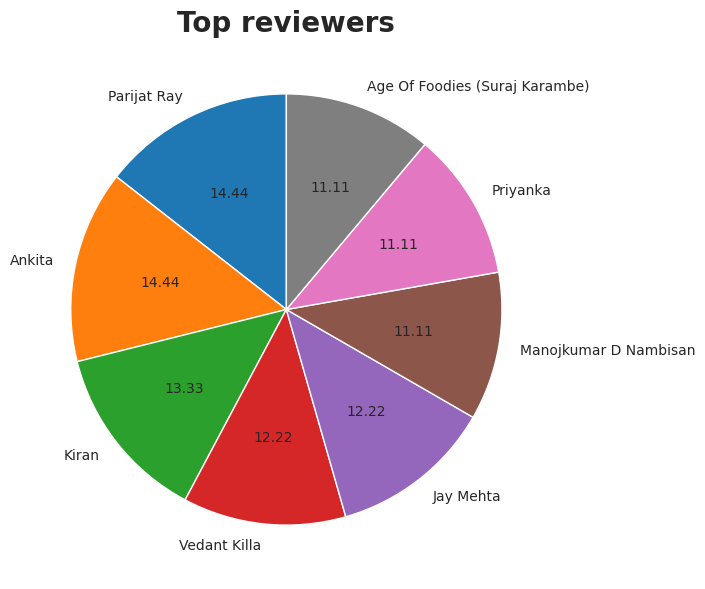

In [389]:
plt.figure(figsize=(15,7))
plt.pie(reviewers_count,autopct='%.2f',labels=reviewers_count.index,startangle=90)
plt.title('Top reviewers',weight='bold',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Wanted to know which reviewer had given most reviews, and pie chart would be the best way to get this.

##### 2. What is/are the insight(s) found from the chart?

We can clearly see that Parijat Ray , ankita has given the most reviews followed by Kiran, vedant killa and others.

#### Chart - 7

In [390]:
# Chart - 7 visualization code
df_names.head()

,Restaurant,Cost,Cuisines,Collections
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","Food Hygiene Rated Restaurants in Hyderabad, C..."
1,Paradise,800,"Biryani, North Indian, Chinese",Hyderabad's Hottest
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts","Great Buffets, Hyderabad's Hottest"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",Late Night Restaurants
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med...","Best Bars & Pubs, Food Hygiene Rated Restauran..."


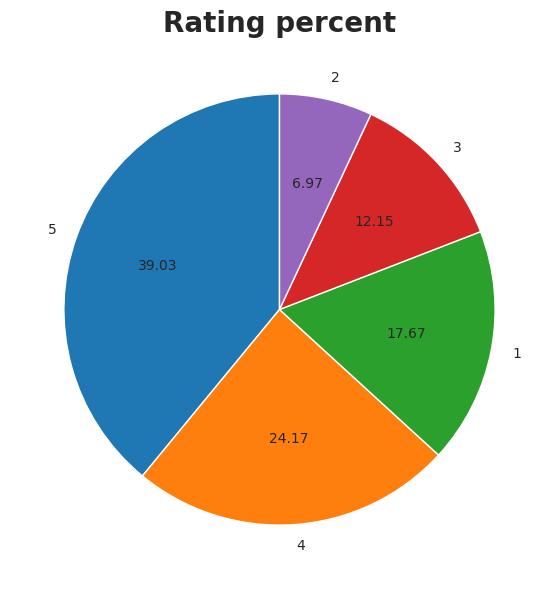

In [391]:
df_restaurant_review=df_reviews['Rating'].value_counts().head()
plt.figure(figsize=(15,7))
plt.pie(df_restaurant_review,autopct='%.2f',labels=df_restaurant_review.index,startangle=90)
plt.title('Rating percent',weight='bold',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Wanted to find reviewers rating behaviour and how many reviews got how much rating.

##### 2. What is/are the insight(s) found from the chart?

We can clearly see that reviewers has given '5' rating review the most followed by 4, 1 and 3 and 2.

#### Chart - 8

In [392]:
# Chart - 8 visualization code
df_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [393]:
df_reviews['Pictures'].max()

64

<Axes: >

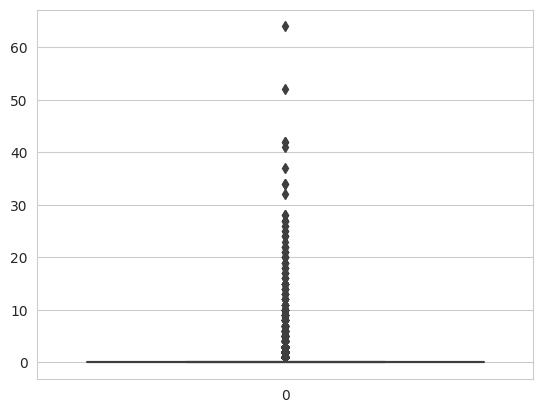

In [394]:
sns.boxplot(data=df_reviews['Pictures'])

##### 1. Why did you pick the specific chart?

This column had outliers and i wanted to detect them

##### 2. What is/are the insight(s) found from the chart?

We found that pictures column has too many outliers.

#***EDA***

In [395]:
#EDA
df_reviews.head(10)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,0
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4,1 Review,5/23/2019 15:01,0
8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5,"1 Review , 1 Follower",5/22/2019 23:12,0
9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5,"1 Review , 1 Follower",5/22/2019 22:37,0


In [396]:
# Null values:
df_reviews.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [397]:
# Converting 'rating' column Like rating into nan value:
df_reviews[df_reviews['Rating']=='Like']=np.nan

# Converting 'Rating'column in float dtype:
df_reviews['Rating'] = df_reviews['Rating'].astype('float64')

In [398]:
# Checking unique values in rating column:
df_reviews['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5, nan])

In [399]:
# Replacing null value with mean value of rating column:
df_reviews['Rating'].fillna(round(df_reviews['Rating'].mean(),1),inplace=True)

In [400]:
# Checking unique values in rating column:
df_reviews['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5, 3.6])

In [401]:
# Spliting metadata column in two columns (Followers and Reviews):
df_reviews['reviews'],df_reviews['Followers'] = df_reviews['Metadata'].str.split(',').str
df_reviews['reviews'] = pd.to_numeric(df_reviews['reviews'].str.split(' ').str[0])

'''
Here we splitted on basis on ',' =>[1 Review , 2 Followers] it became ==> 1 review |  2 follower
Then converted review column in numeric form for that, inside pd.to_numeric column we converted review column into string and splitted
it on basis of ' ' => [1 review] ==> 1 | review then converted into string again and grabbed 0th index.
'''

<ipython-input-401-9cc1212a0c50>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_reviews['reviews'],df_reviews['Followers'] = df_reviews['Metadata'].str.split(',').str


" \nHere we splitted on basis on ',' =>[1 Review , 2 Followers] it became ==> 1 review |  2 follower\nThen converted review column in numeric form for that, inside pd.to_numeric column we converted review column into string and splitted\nit on basis of ' ' => [1 review] ==> 1 | review then converted into string again and grabbed 0th index.\n"

In [402]:
# Converted 'followers' column in numeric column:
# Same step used/ done for reviews column:
df_reviews['Followers'] = pd.to_numeric(df_reviews['Followers'].str.split(' ').str[1])

In [403]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9999 non-null   object 
 1   Reviewer    9961 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      10000 non-null  float64
 4   Metadata    9961 non-null   object 
 5   Time        9961 non-null   object 
 6   Pictures    9999 non-null   float64
 7   reviews     9961 non-null   float64
 8   Followers   8383 non-null   float64
dtypes: float64(4), object(5)
memory usage: 703.2+ KB


In [404]:
# This is what our dataset look like:
df_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,3.0,2.0


In [405]:
# Converted Time column in datetime format and created seperate columns of month,date,year and hours
df_reviews['Time']=pd.to_datetime(df_reviews['Time'])
df_reviews['Date']=df_reviews['Time'].dt.day
df_reviews['Month']=df_reviews['Time'].dt.month
df_reviews['Year']=df_reviews['Time'].dt.year
df_reviews['Hour']=df_reviews['Time'].dt.hour

In [406]:
# Dropped metadata column from reviews dataset.
df_reviews.drop(columns='Metadata',inplace=True)

In [407]:
df_reviews.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,reviews,Followers,Date,Month,Year,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,25.0,5.0,2019.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,25.0,5.0,2019.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,24.0,5.0,2019.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,24.0,5.0,2019.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,24.0,5.0,2019.0,21.0


In [408]:
# Calculated null values:
df_reviews.isnull().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
reviews         39
Followers     1617
Date            39
Month           39
Year            39
Hour            39
dtype: int64

In [409]:
# fill null values with 0:
df_reviews['reviews'].fillna(0,inplace=True)
df_reviews['Followers'].fillna(0,inplace=True)

In [410]:
# Drop other null values:
df_reviews.dropna(inplace=True)

In [411]:
df_reviews.reset_index(inplace=True)

In [412]:
df_reviews.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,reviews,Followers,Date,Month,Year,Hour
0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,25.0,5.0,2019.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,25.0,5.0,2019.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,24.0,5.0,2019.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,24.0,5.0,2019.0,22.0
4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,24.0,5.0,2019.0,21.0


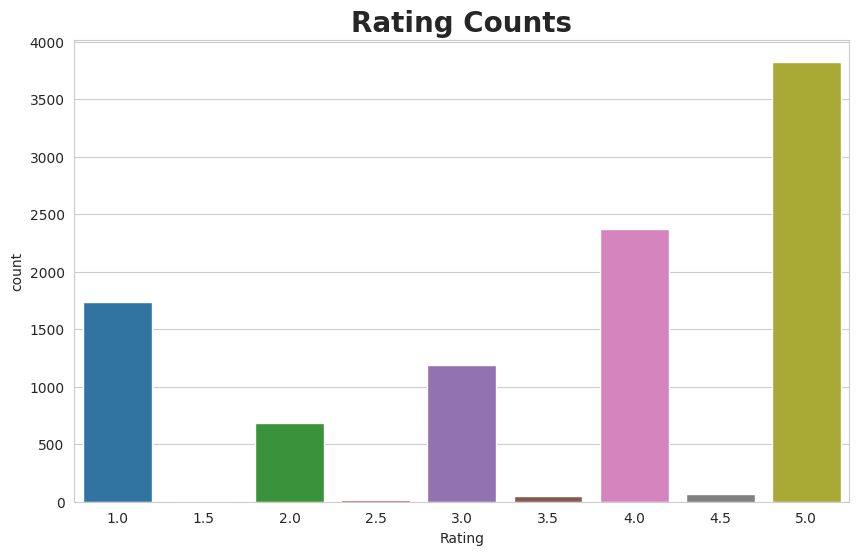

In [413]:
# Rating Counts
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x ='Rating',data=df_reviews)
plt.title("Rating Counts",weight = 'bold',fontsize=20)
plt.show()

<Axes: title={'center': 'Time column distribution'}, xlabel='Time', ylabel='Count'>

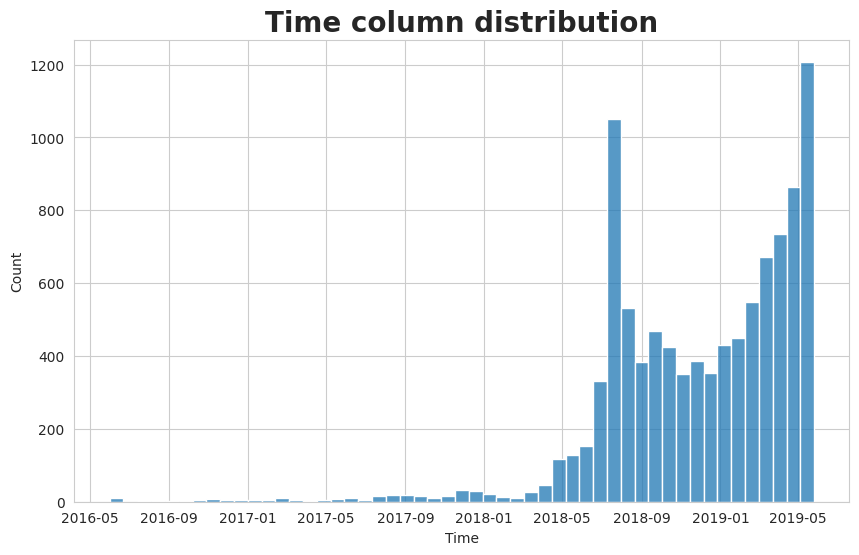

In [414]:
# Checking and plotting time column distribution:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plt.title("Time column distribution",weight='bold',fontsize=20)
sns.histplot(df_reviews.Time)

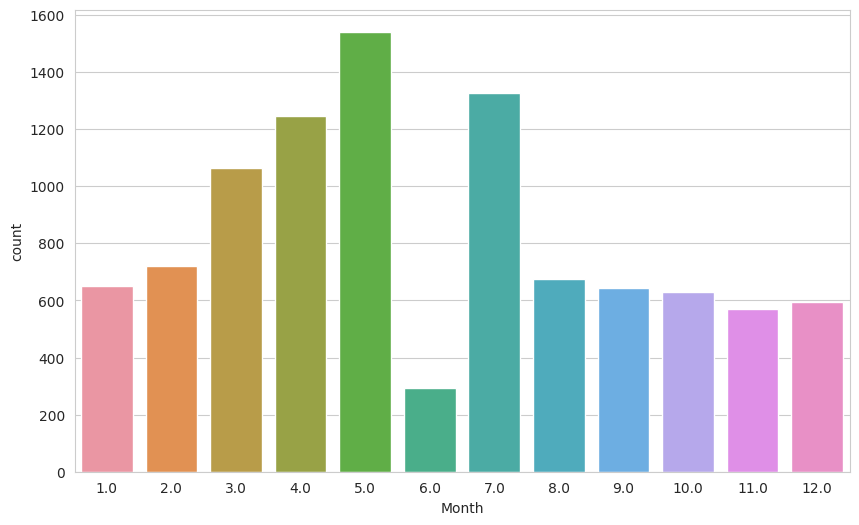

In [415]:
# Reviews count per month:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='Month',data=df_reviews)
plt.show()

In [416]:
# Check:
df_reviews[df_reviews['Month']==12.0].shape

(594, 13)

In [417]:
# Which reviewer gave how much reviews:
reviewer_list = df_reviews['Reviewer'].value_counts().reset_index(name='Count').rename(columns={'index':'Reviewer'}).head(15)

In [418]:
reviewer_list

,Reviewer,Count
0,Ankita,13
1,Parijat Ray,13
2,Kiran,12
3,Jay Mehta,11
4,Vedant Killa,11
5,Sravani,10
6,Priyanka,10
7,Siva Kumar,10
8,Age Of Foodies (Suraj Karambe),10
9,Manojkumar D Nambisan,10


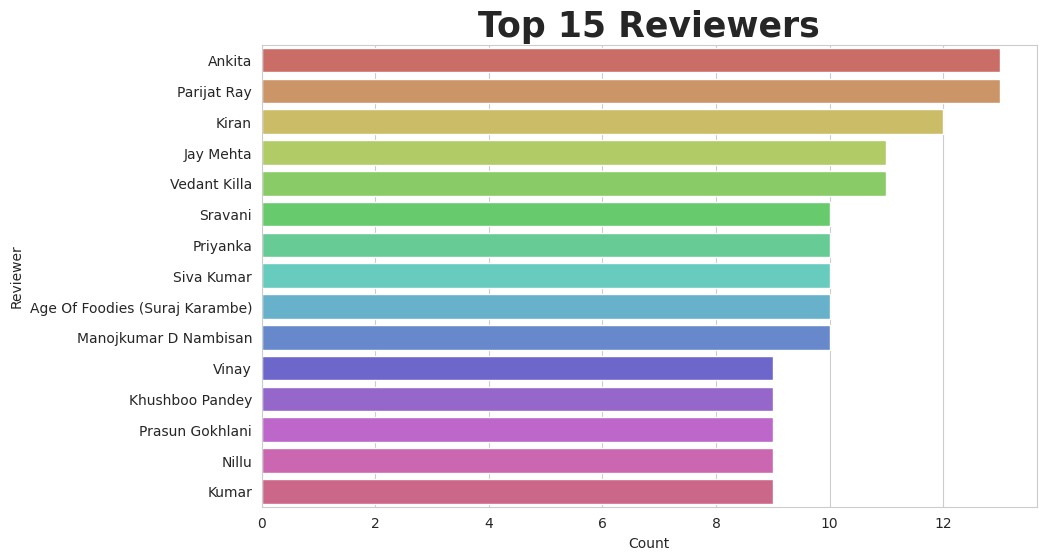

In [419]:
# Plotting barplot of top 15 reviewers:
plt.figure(figsize=(10,6))
x = reviewer_list['Count']
y = reviewer_list['Reviewer']
sns.barplot(x=x,y=y,palette='hls' )
plt.title("Top 15 Reviewers",weight='bold',fontsize=25)
plt.show()

In [420]:
# Calculating average rating given by reviewers:
review_rating = df_reviews.groupby('Reviewer').apply(lambda x :np.average(x['Rating'])).reset_index(name='Average_rating')
review_rating = pd.merge(reviewer_list,review_rating,how='inner',on='Reviewer').head(15).sort_values('Average_rating',ascending=False)
review_rating =review_rating[:15]
review_rating

,Reviewer,Count,Average_rating
14,Kumar,9,4.666667
2,Kiran,12,4.500000
4,Vedant Killa,11,4.000000
5,Sravani,10,4.000000
12,Prasun Gokhlani,9,4.000000
0,Ankita,13,3.923077
10,Vinay,9,3.777778
11,Khushboo Pandey,9,3.777778
3,Jay Mehta,11,3.727273
9,Manojkumar D Nambisan,10,3.700000


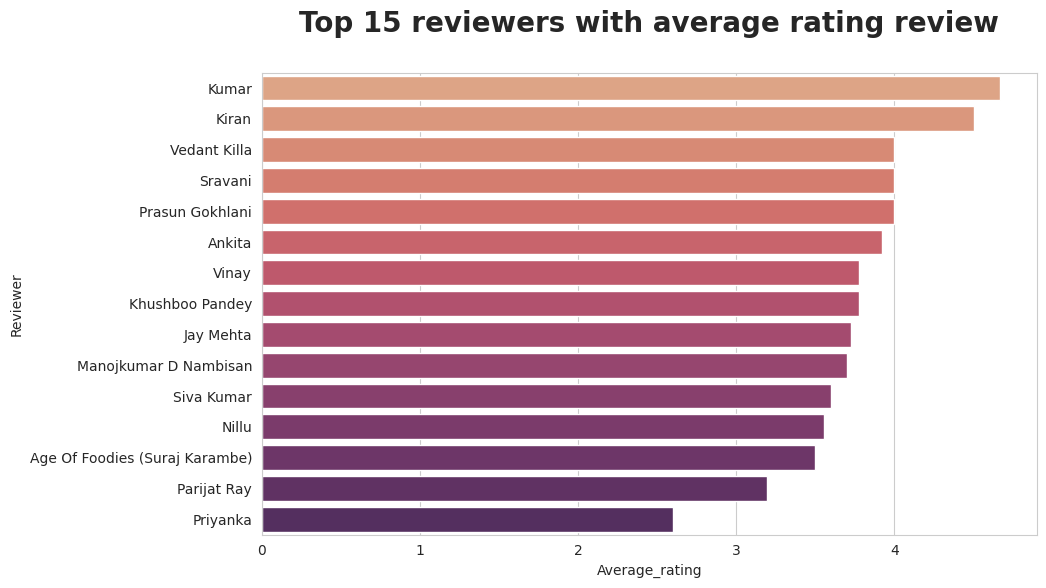

In [421]:
# Top 15 reviewers with average rating review:
plt.figure(figsize=(10,6))
x = review_rating['Average_rating']
y = review_rating['Reviewer']
sns.barplot(x=x,y=y,palette='flare')
plt.title("Top 15 reviewers with average rating review\n",weight ='bold',fontsize=20)
plt.show()

In [422]:
df_reviews.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,reviews,Followers,Date,Month,Year,Hour
0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,25.0,5.0,2019.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,25.0,5.0,2019.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,24.0,5.0,2019.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,24.0,5.0,2019.0,22.0
4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,24.0,5.0,2019.0,21.0


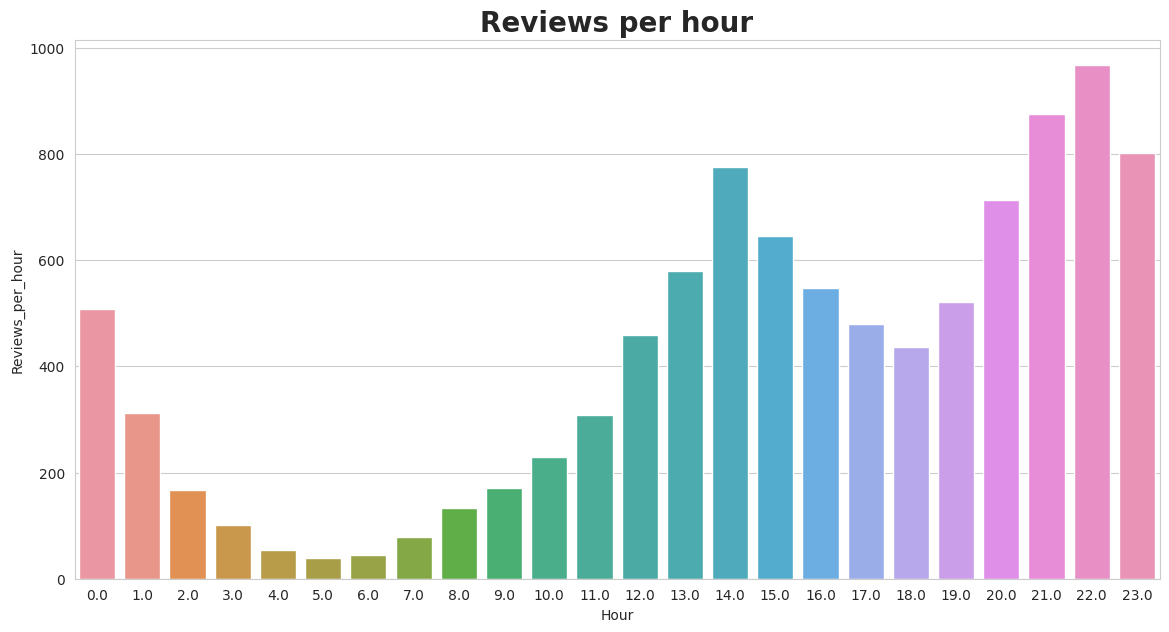

In [423]:
# Which hour get how much reviews:
plt.figure(figsize=(14,7))
reviews_hour = df_reviews.groupby('Hour').apply(lambda x :x['Hour'].count()).reset_index(name='Reviews_per_hour')
x=reviews_hour['Hour']
y=reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",weight='bold',fontsize=20)
sns.barplot(x=x,y=y)
plt.show()

In [424]:
df_reviews.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,reviews,Followers,Date,Month,Year,Hour
0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,25.0,5.0,2019.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,25.0,5.0,2019.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,24.0,5.0,2019.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,24.0,5.0,2019.0,22.0
4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,24.0,5.0,2019.0,21.0


<ipython-input-464-a426e30d2425>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  text = " ".join(names for names in df_reviews['Review'].str.replace('.','').str.lower(  ))


(-0.5, 799.5, 599.5, -0.5)

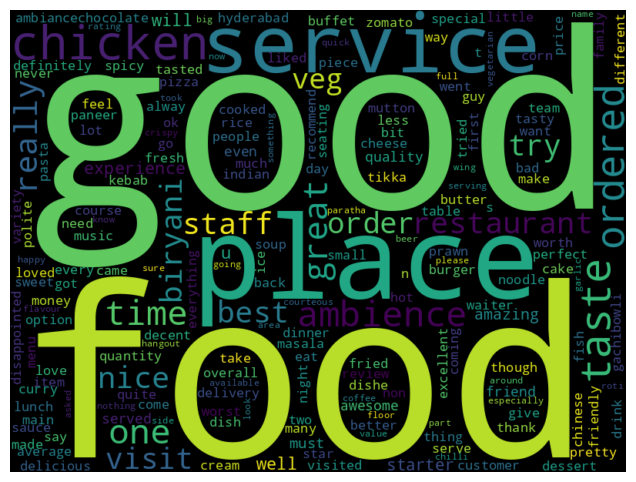

In [464]:
# Wordcolud for Review column:
plt.figure(figsize=(10,6))
text = " ".join(names for names in df_reviews['Review'].str.replace('.','').str.lower(  ))
wordcloud = WordCloud(width=800,height=600,collocations=False,background_color='black').generate(text)
plt.imshow(wordcloud,interpolation='bilinear' )
plt.grid(False)
plt.axis(False)

In [426]:
df_reviews['Review']

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9949    Madhumathi Mahajan Well to start with nice cou...
9950    This place has never disappointed us.. The foo...
9951    Bad rating is mainly because of "Chicken Bone ...
9952    I personally love and prefer Chinese Food. Had...
9953    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [427]:
# Required imports
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string

In [428]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [460]:
def text_process(text):
  tokens = nltk.word_tokenize(text)

  # Removing stopwords:
  stop_words= set(stopwords.words('english'))
  tokens = [word.lower() for word in tokens if (word.isalpha() and word.lower() not in stop_words and word not in string.punctuation)]

  # Lemmatization:
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  #Stemming:
  ps = PorterStemmer()
  tokens = [ps.stem(word) for word in tokens]

  text_processed = " ".join(tokens)
  return text_processed




In [461]:
# Applying function to 'Review' column:
df_reviews['processed_reviews'] = df_reviews['Review'].apply(text_process)

In [463]:
# Comparing old review column with processed review column:
df_reviews[['Review','processed_reviews']].head()

,Review,processed_reviews
0,"The ambience was good, food was quite good . h...",ambienc good food quit good saturday lunch cos...
1,Ambience is too good for a pleasant evening. S...,ambienc good pleasant even servic prompt food ...
2,A must try.. great food great ambience. Thnx f...,must tri great food great ambienc thnx servic ...
3,Soumen das and Arun was a great guy. Only beca...,soumen da arun great guy behavior sincereti go...
4,Food is good.we ordered Kodi drumsticks and ba...,food order kodi drumstick basket mutton biryan...


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***